#**Problema:**
Analizar si existen patrones entre 3 de las características presentes

#**Adquisición de datos**

In [42]:


 
#%matplotlib inline

#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')

In [43]:
# adquisición de datos
import pandas as pd
dataframe = pd.read_csv(r"data\twitter_data.csv")

**Campos del dataset:**

* usuario (el nombre en Twitter)
* “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* “co” =Conscientiousness – grado de orden, prolijidad, organización
* “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
* “ag” = Agreeableness – grado de empatía con los demás, temperamento
* “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)



**El archivo contiene diferenciadas 9 categorías -actividades** laborales- que son:

* Actor/actriz
* Cantante
* Modelo
* Tv, series
* Radio
* Tecnología
* Deportes
* Politica
* Escritor


#**Indagando datos**

In [44]:
print(dataframe.head())
# indagando los datos
dataframe.describe()

           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  


,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [45]:

print(dataframe.groupby('categoria').size())


categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


C:\Users\enime\AppData\Local\Temp\ipykernel_19780\1199652313.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


array([[<AxesSubplot:title={'center':'op'}>,
        <AxesSubplot:title={'center':'co'}>],
       [<AxesSubplot:title={'center':'ex'}>,
        <AxesSubplot:title={'center':'ag'}>],
       [<AxesSubplot:title={'center':'ne'}>,
        <AxesSubplot:title={'center':'wordcount'}>]], dtype=object)

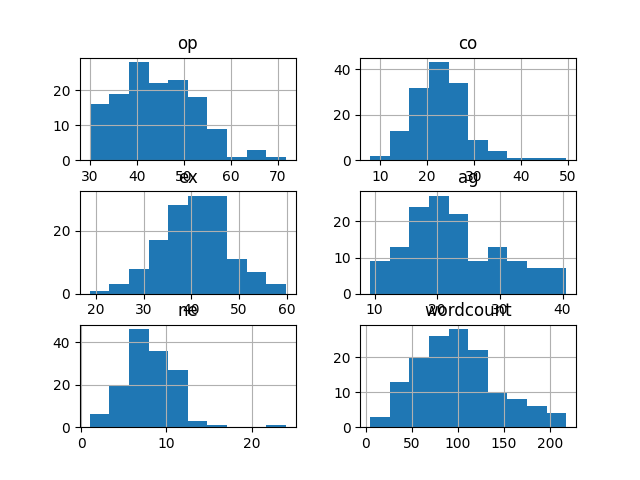

In [46]:
%matplotlib widget
dataframe.drop(['categoria'],1).hist()

#**Pre procesamiento**

In [47]:
# atributos a utilizar:
#“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
#“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
#“ag” = Agreeableness – grado de empatía con los demás, temperamento

import numpy as np

# instanciar array de numpy con datos de un dataframe
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

(140, 3)
[34.297953 41.948819 29.370315]


C:\Users\enime\AppData\Local\Temp\ipykernel_19780\2665195108.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


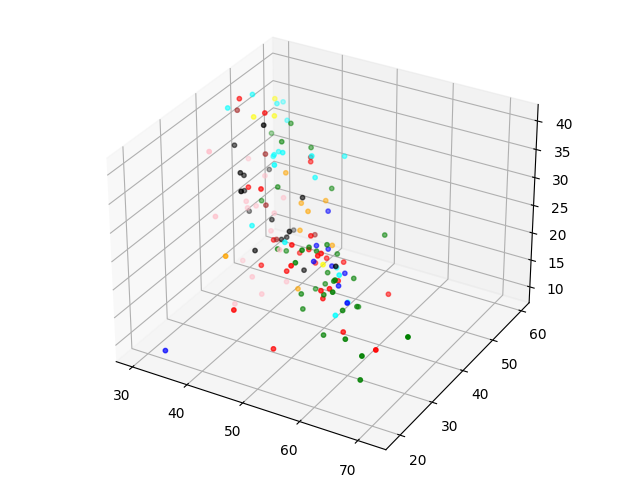

In [48]:
# graficar características seleccionadas
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

print(X.shape)
print(X[0])

fig = plt.figure()
ax = Axes3D(fig)

# necesitamos colores para las 9 categorias
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']

asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=10)

#from numpy import unique
#print(unique(asignar))

#**Modelando**

#**Mejorar la performance del algoritmo. Elegir el valor de K**



[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]
[-25194.03935276632, -12632.031536945231, -9983.390995404656, -8348.890870658637, -7008.010790396847, -6182.847582042668, -5507.319053275078, -4878.859505466188, -4464.529483494931, -4110.987566809102, -3606.385477345731, -3354.484659748306, -3169.9091145279026, -2991.3432205564336, -2841.438736643059, -2623.377456123607, -2541.159546668777, -2443.103679305032, -2191.466723294632]


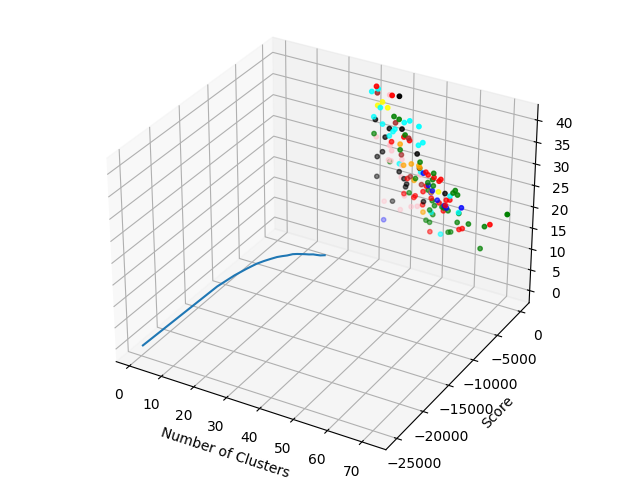

In [49]:
from sklearn.cluster import KMeans
#from sklearn.metrics import pairwise_distances_argmin_min

# instanciar modelos k-means para elbow curve (curva del codo)
Nc = range(1, 20)
# list comprehension
#kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans = []
for i in Nc:
  kmeans.append(KMeans(n_clusters=i))
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)


plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [50]:
# modelando con el mejor K
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.968253   32.53013537 20.93305995]
 [39.79572573 43.31488953 23.42198887]
 [35.90241306 47.56828232 33.58748762]
 [49.99285115 40.87133549 17.47411785]
 [58.58657531 31.02839375 15.6120435 ]]


#**Usando el modelo**

C:\Users\enime\AppData\Local\Temp\ipykernel_19780\3943693593.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


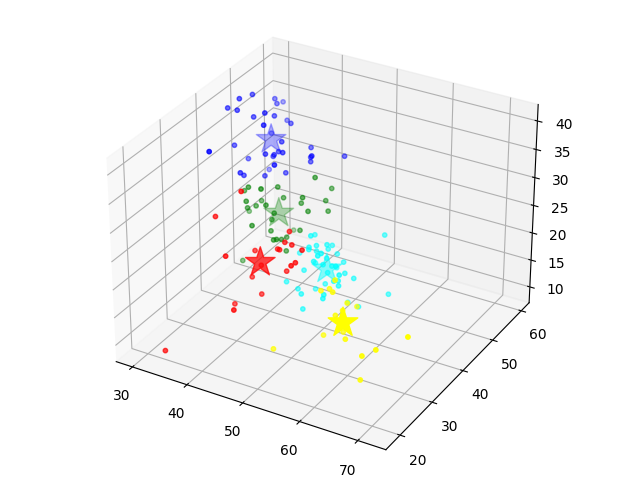

In [51]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=10)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=500)

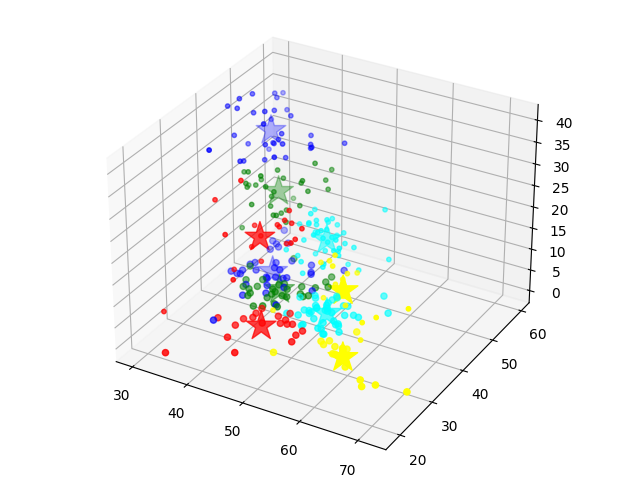

In [52]:
#“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
#“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social

# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=500)
plt.show()

In [53]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,19
1,green,30
2,blue,34
3,cyan,41
4,yellow,16


In [60]:
#group_referrer_index = copy['label'] ==0
# print(copy['label'])
mascara_nodos_cluster_0 = (copy['label'] == 0)
group_referrals = copy[mascara_nodos_cluster_0]
# print(group_referrals.info())
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,NaN


In [55]:
'''
El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1 Actor/actriz
2 Cantante
3 Modelo
4 Tv, series
5 Radio
6 Tecnología
7 Deportes
8 Politica
9 Escritor
'''
diversidadGrupo['cantidad']

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    NaN
6    1.0
7    3.0
8    5.0
9    NaN
Name: cantidad, dtype: float64